# Imports

In [2]:
sys.path.append('/home/spike/') #path to the ecogy package

In [3]:
from ecogy.io import FilmProbe, Reader
from ecogy.io import get_raw

# Preprocess data

## Probe

In [4]:
ls /home/spike/ecogy/probes

XA60_FILM_IB1_IB2.csv  XA60_FILM_IB1_IB3.csv  XA60_FILM_IB2_IB3.csv


<IPython.core.display.Javascript object>


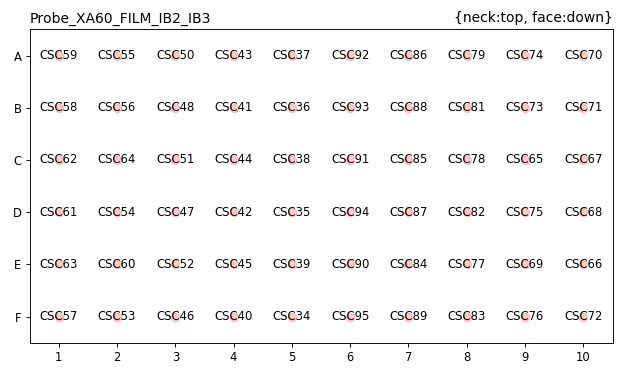

In [5]:
df = pd.read_csv('/home/spike/ecogy/probes/XA60_FILM_IB2_IB3.csv', index_col=0)
fp = FilmProbe(df)
fp.show()

## Data

In [6]:
rec = '2020-02-12_18-16-56'
exp = rec[:10]
year = rec[:4]
# exp = '2019-10-14'

In [7]:
path = f'/home/spike/mounts/R_KHZPV_7322/CheetahData3/Roman/!{year}/{exp}/{rec}/'
assert path[-1] == '/'
path

'/home/spike/mounts/R_KHZPV_7322/CheetahData3/Roman/!2020/2020-02-12/2020-02-12_18-16-56/'

`Reader` is a custom subclass of the `neo.io.NeuralynxIO` class

- Reader 
    - has new properties:
        - `.df_ch` 
    - has new methods:
        - `.info()` 
        - `.select_channels()`
        - `.get_freq()`

In [8]:
reader = Reader(path)
reader.info()

Total number of channels       : 68
    Number of CSC channels     : 64
    Number of PZO channels     : 4


Sampling frequency             : 32000 Hz

Block 0 has:                  
    Segment 0 of length        : 1823.952 s ( 30.3992 )min


In [17]:
raw = get_raw(reader,
              selected_channels = fp.channels, 
              block_index=0, 
              seg_index=0, 
              t_start=1, 
              t_stop=60)

Total number of channels       : 60
    Number of CSC channels     : 60


Sampling frequency             : 32000 Hz

Block 0 has:                  
    Segment 0 of length        : 1823.952 s ( 30.3992 )min


Now we have an MNE object RawArray and can apply all functionality of MNE to it

<IPython.core.display.Javascript object>


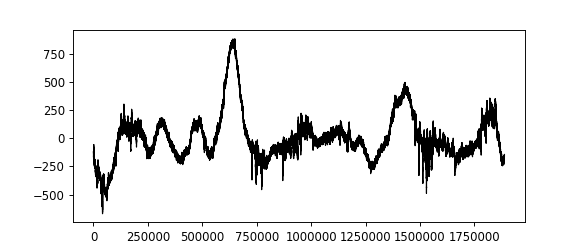

In [18]:
plt.figure()
plt.plot(raw.get_data()[2], 'k', lw=1);

In [19]:
raw = raw.filter(0,1000).resample(1000)

<IPython.core.display.Javascript object>


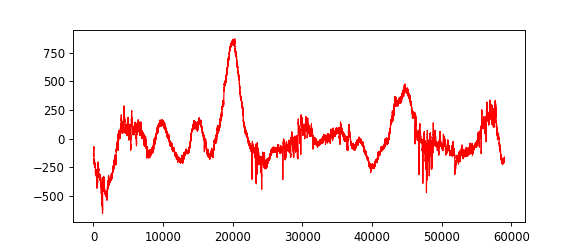

In [20]:
plt.figure()
plt.plot(raw.get_data()[2], 'r', lw=1);